In [635]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



from sklearn.cluster import KMeans


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [636]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [637]:
df.shape

(200, 5)

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [639]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [640]:
df.duplicated().sum()

0

In [641]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

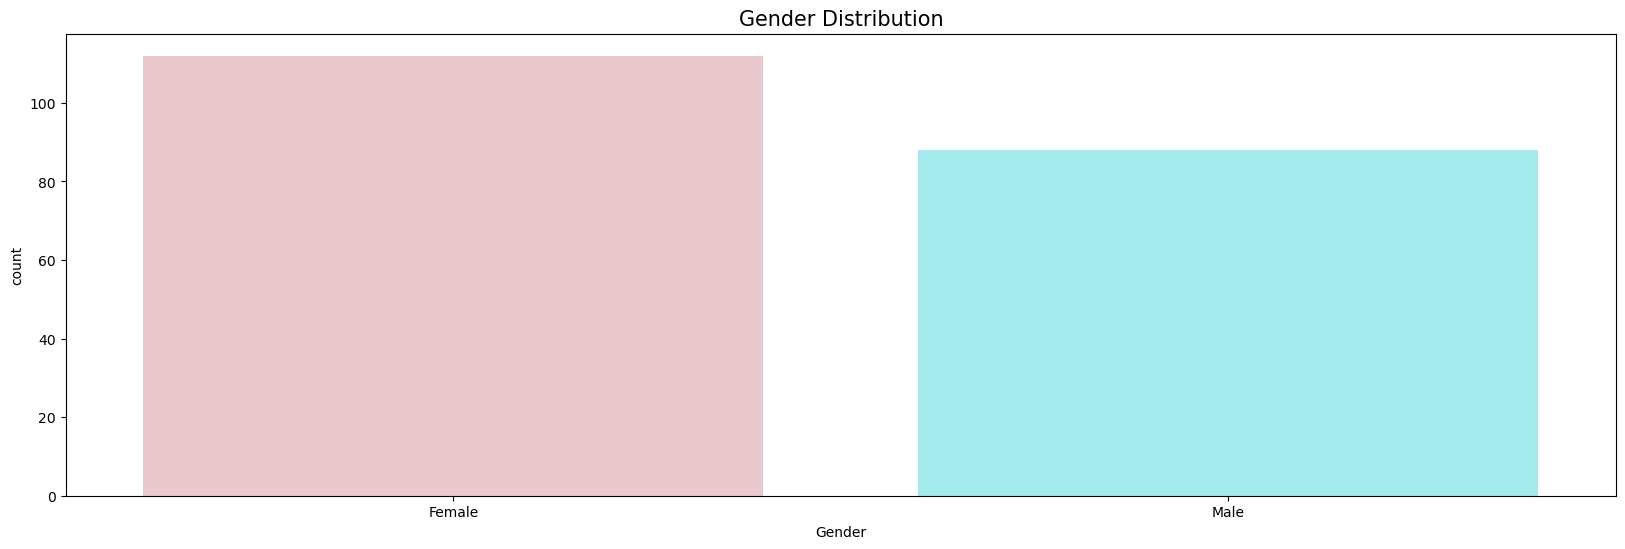

In [642]:
plt.figure(figsize=(20,6))
sns.barplot(df["Gender"].value_counts(),palette=["#EFC3CA","#98F5F9"])
plt.title("Gender Distribution",fontsize=15)

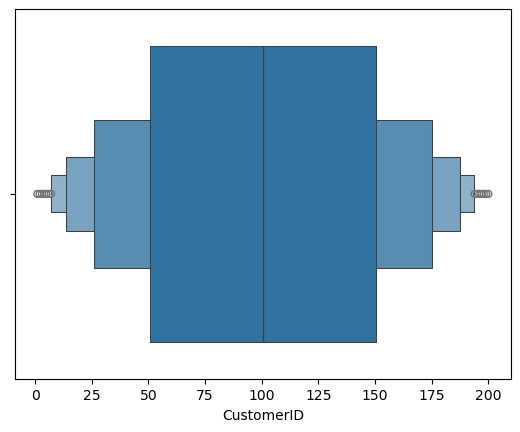

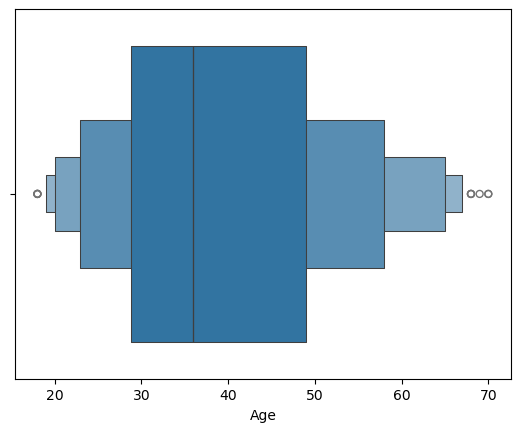

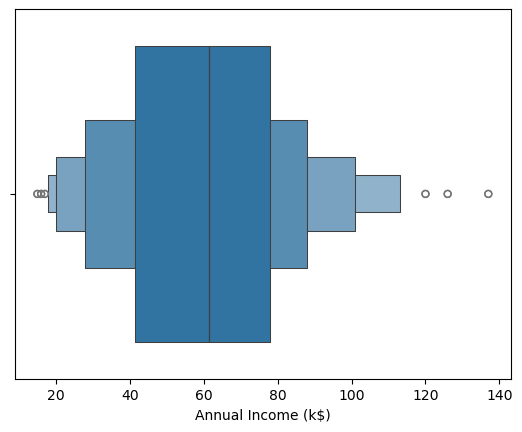

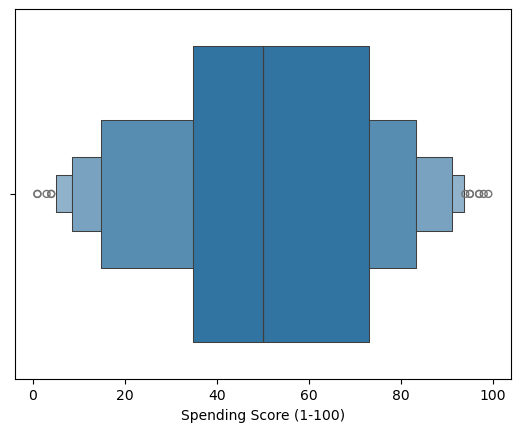

In [643]:
for i in df.select_dtypes(include="number").columns:
    sns.boxenplot(data=df,x=i)
    plt.show()

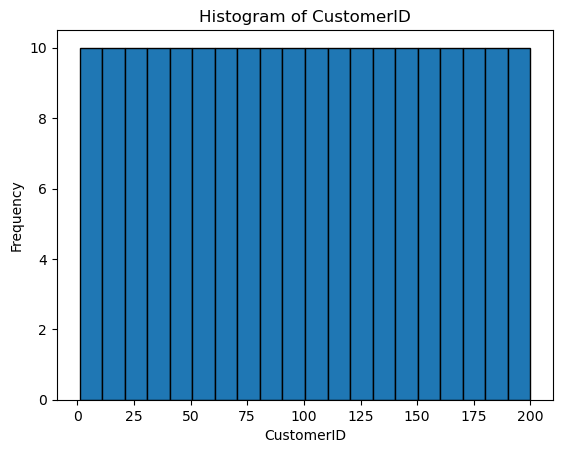

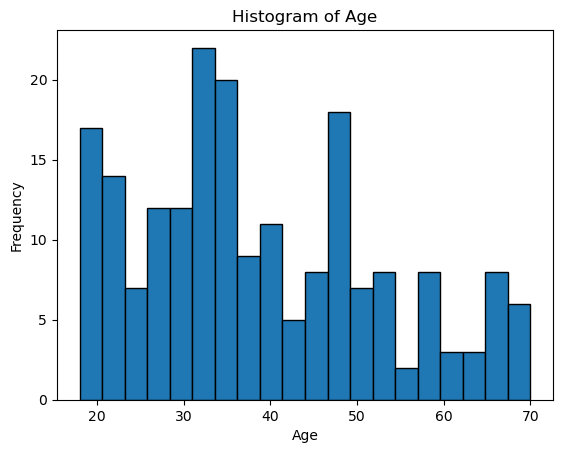

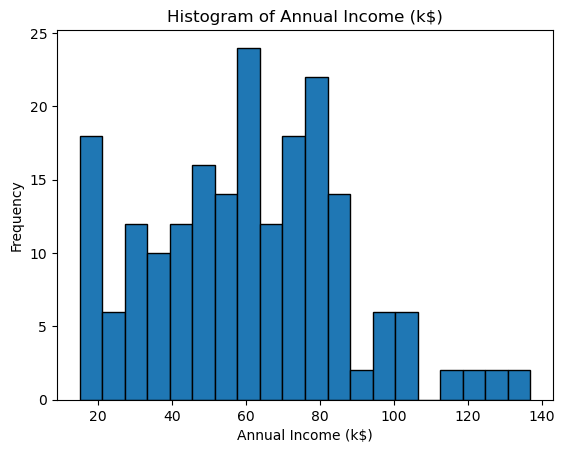

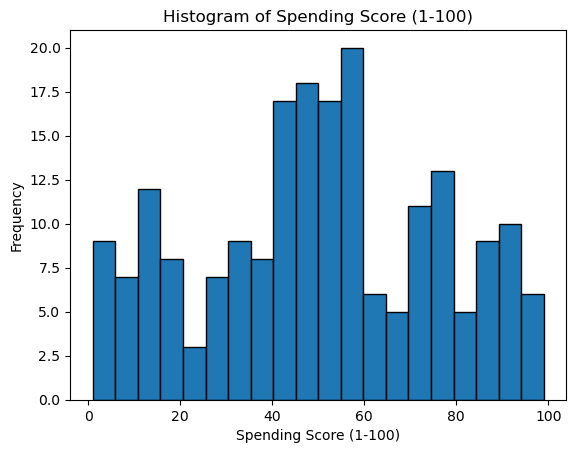

In [644]:
for i in df.select_dtypes(include="number").columns:
    plt.hist(df[i], bins=20,edgecolor="k")  
    plt.title(f"Histogram of {i}")
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 2000x600 with 0 Axes>

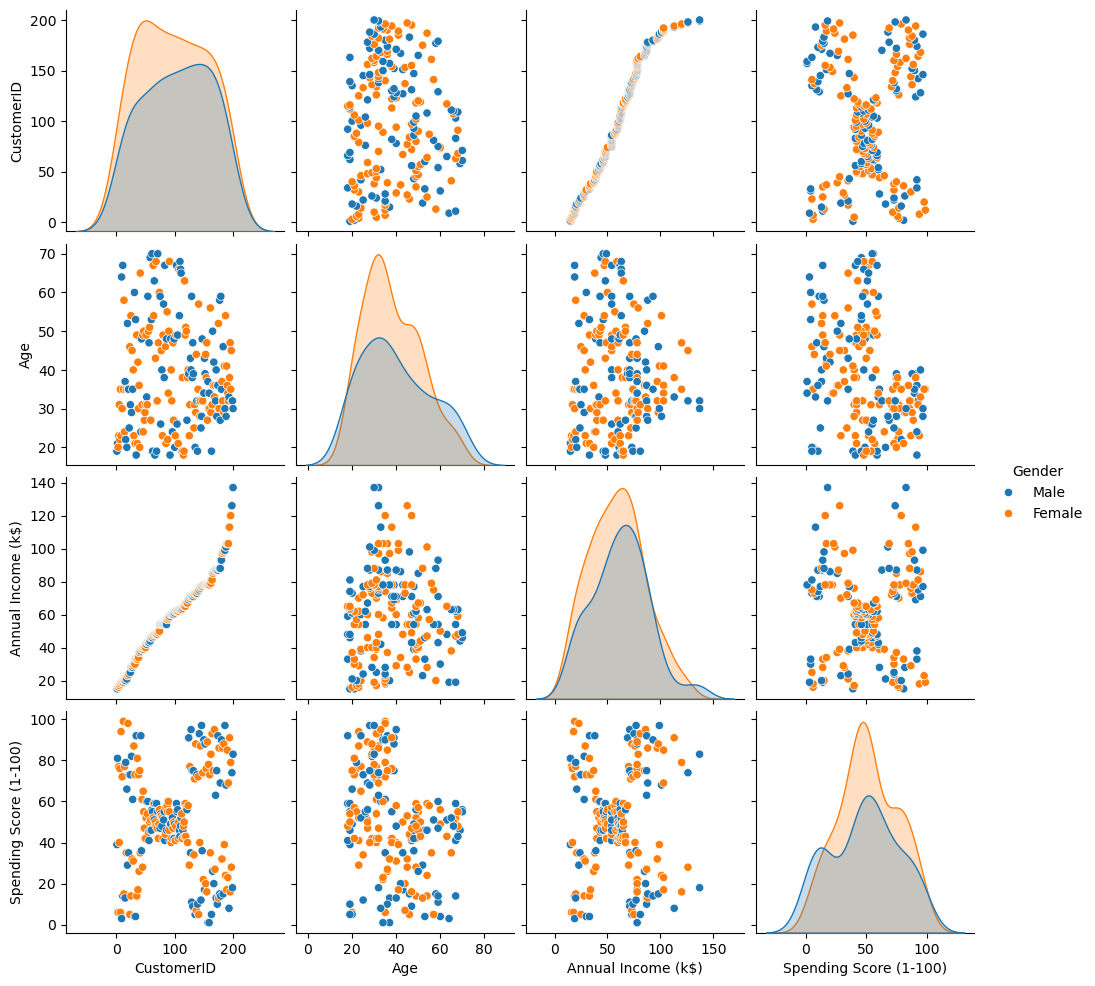

In [645]:
plt.figure(figsize=(20,6))
sns.pairplot(df,hue="Gender")

In [646]:
la=LabelEncoder()

In [647]:
df.Gender=la.fit_transform(df["Gender"])

In [710]:
#IN Our data w dont have target so we are working on data as all 
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_mean
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,3
197,198,1,32,126,74,2
198,199,1,32,137,18,3


<Axes: >

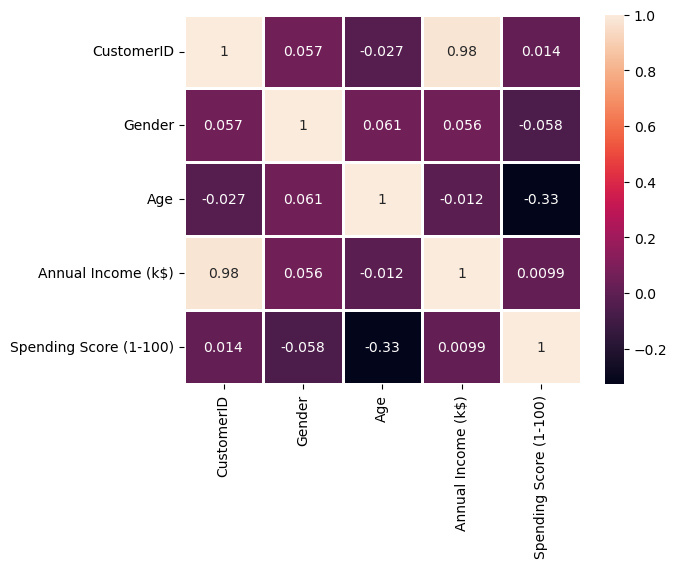

In [649]:
sns.heatmap(df.corr(),annot=True,linewidths=1)

In [650]:
#scal=StandardScaler()

In [651]:
#xdata=scal.fit_transform(df[["Age","Annual Income (k$)","Spending Score (1-100)"]])

In [652]:
#when the clusters increase the intertia(error rate) increase
model=KMeans(n_clusters=5)

In [653]:
model.fit(df)

KMeans(n_clusters=5)

In [654]:
#Error Rate
model.inertia_

157580.58908141742

In [655]:
clustersn=[]
j=[]

In [656]:
#check the smallest cluster 
for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(df)
    clustersn.append(i)
    j.append(model.inertia_)

In [714]:
pd.DataFrame({"Cluster": clustersn, "Inertia": j})

,Cluster,Inertia
0,1,975512.060000
1,2,387065.713771
2,3,271396.562966
3,4,195401.198560
4,5,176578.411905
5,6,122751.823661
6,7,103301.486394
7,8,86075.034222
8,9,77812.941695
9,10,71213.336874


Text(0, 0.5, 'Error Rate')

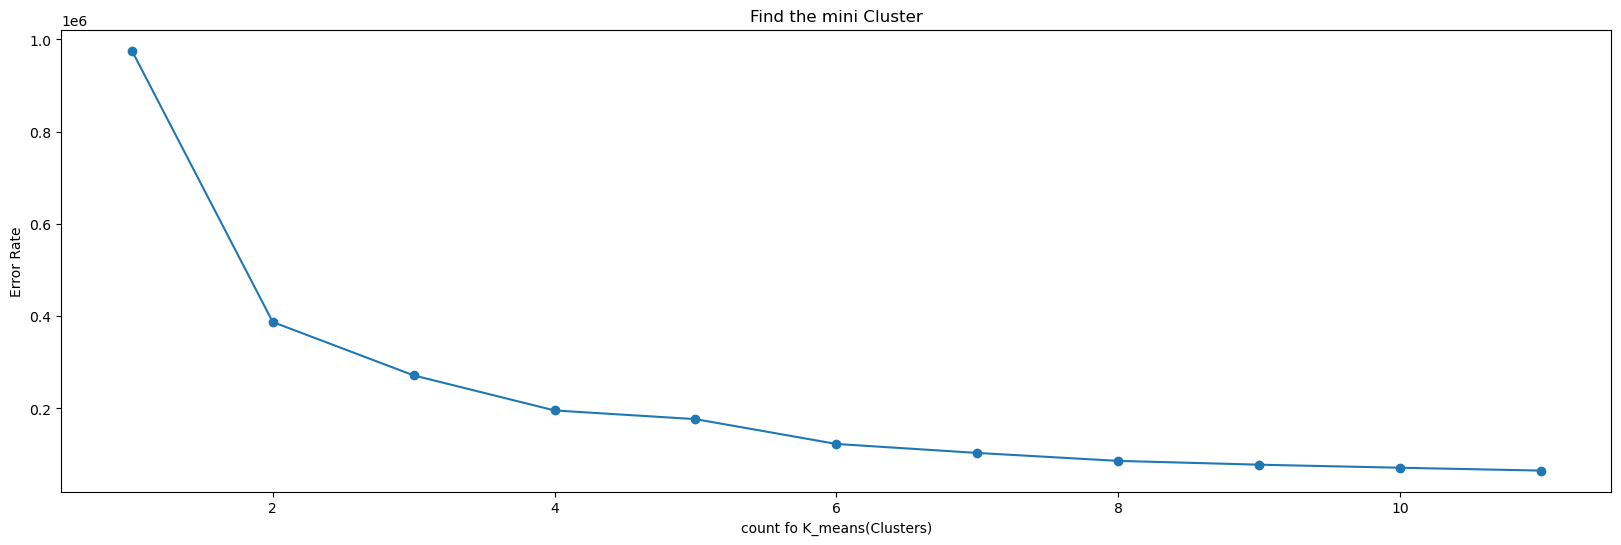

In [658]:
plt.figure(figsize=(20,6))
plt.plot(clustersn,j,marker="o")
plt.title("Find the mini Cluster")
plt.xlabel("count fo K_means(Clusters)")
plt.ylabel("Error Rate")

In [659]:
model=KMeans(n_clusters=4)
model.fit(df)

KMeans(n_clusters=4)

In [660]:
ypred=model.predict(df)

In [661]:
df["K_mean"]=ypred

In [662]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),K_mean
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,2
196,197,0,45,126,28,3
197,198,1,32,126,74,2
198,199,1,32,137,18,3


In [663]:
df1=df[df["K_mean"]==0]
df2=df[df["K_mean"]==1]
df3=df[df["K_mean"]==2]
df4=df[df["K_mean"]==3]

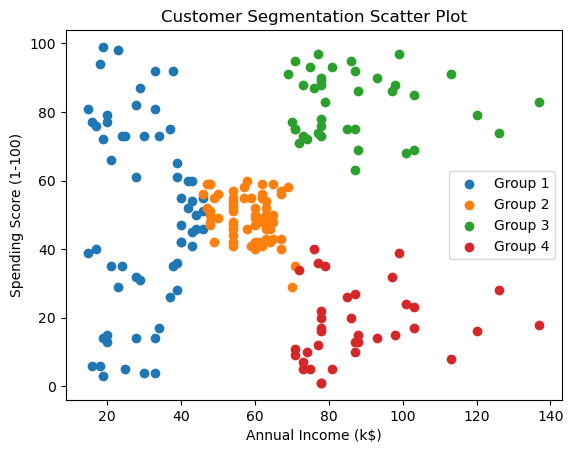

In [664]:
plt.scatter(df1["Annual Income (k$)"], df1["Spending Score (1-100)"], label="Group 1")
plt.scatter(df2["Annual Income (k$)"], df2["Spending Score (1-100)"], label="Group 2")
plt.scatter(df3["Annual Income (k$)"], df3["Spending Score (1-100)"], label="Group 3")
plt.scatter(df4["Annual Income (k$)"], df4["Spending Score (1-100)"], label="Group 4")

# Add labels and title
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation Scatter Plot")

# Show legend
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='K_mean', ylabel='count'>

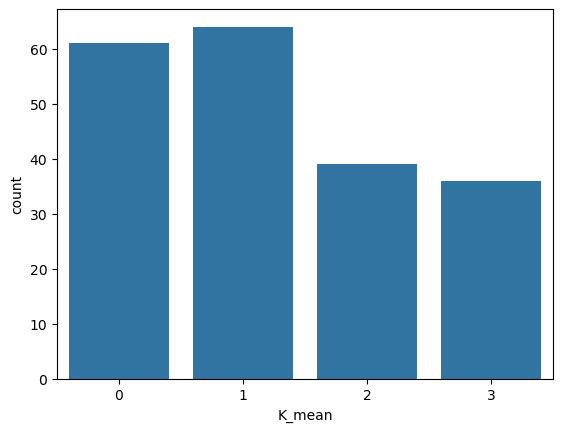

In [665]:
sns.barplot(df["K_mean"].value_counts())

<Axes: ylabel='count'>

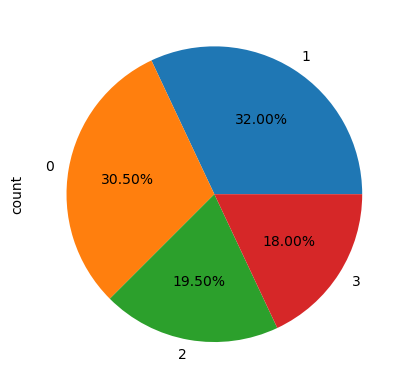

In [666]:
df["K_mean"].value_counts().plot.pie(autopct="%0.2f%%")

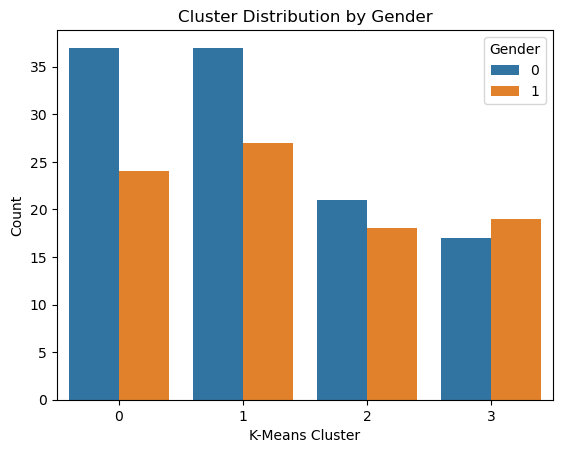

In [667]:
sns.countplot(x=df["K_mean"], hue=df["Gender"])

plt.xlabel("K-Means Cluster")
plt.ylabel("Count")
plt.title("Cluster Distribution by Gender")

plt.show()